# **UTS Machine Learning**

Nama : Aulia Samudra Jimananda

NIM  : 1103201264

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from sklearn import datasets
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

%matplotlib inline

# **Load the Data**

In [ ]:
#Load the data
breast_cancer = datasets.load_breast_cancer()

#Dataset -> Pandas DataFrame
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

#Show the Data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# **Data Visualization**

Using CountPlot

<Axes: xlabel='target', ylabel='count'>

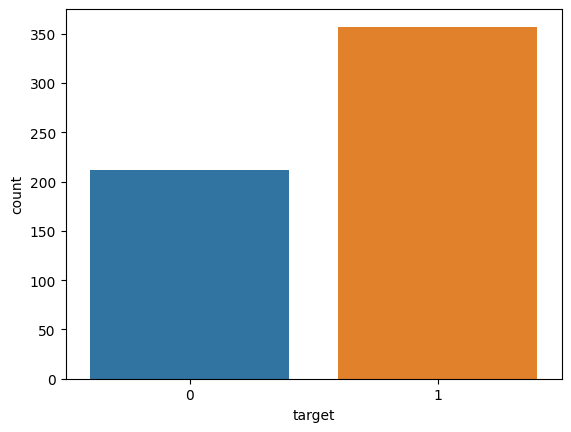

In [ ]:
sns.countplot(x='target', data=df)

Using Pairplot

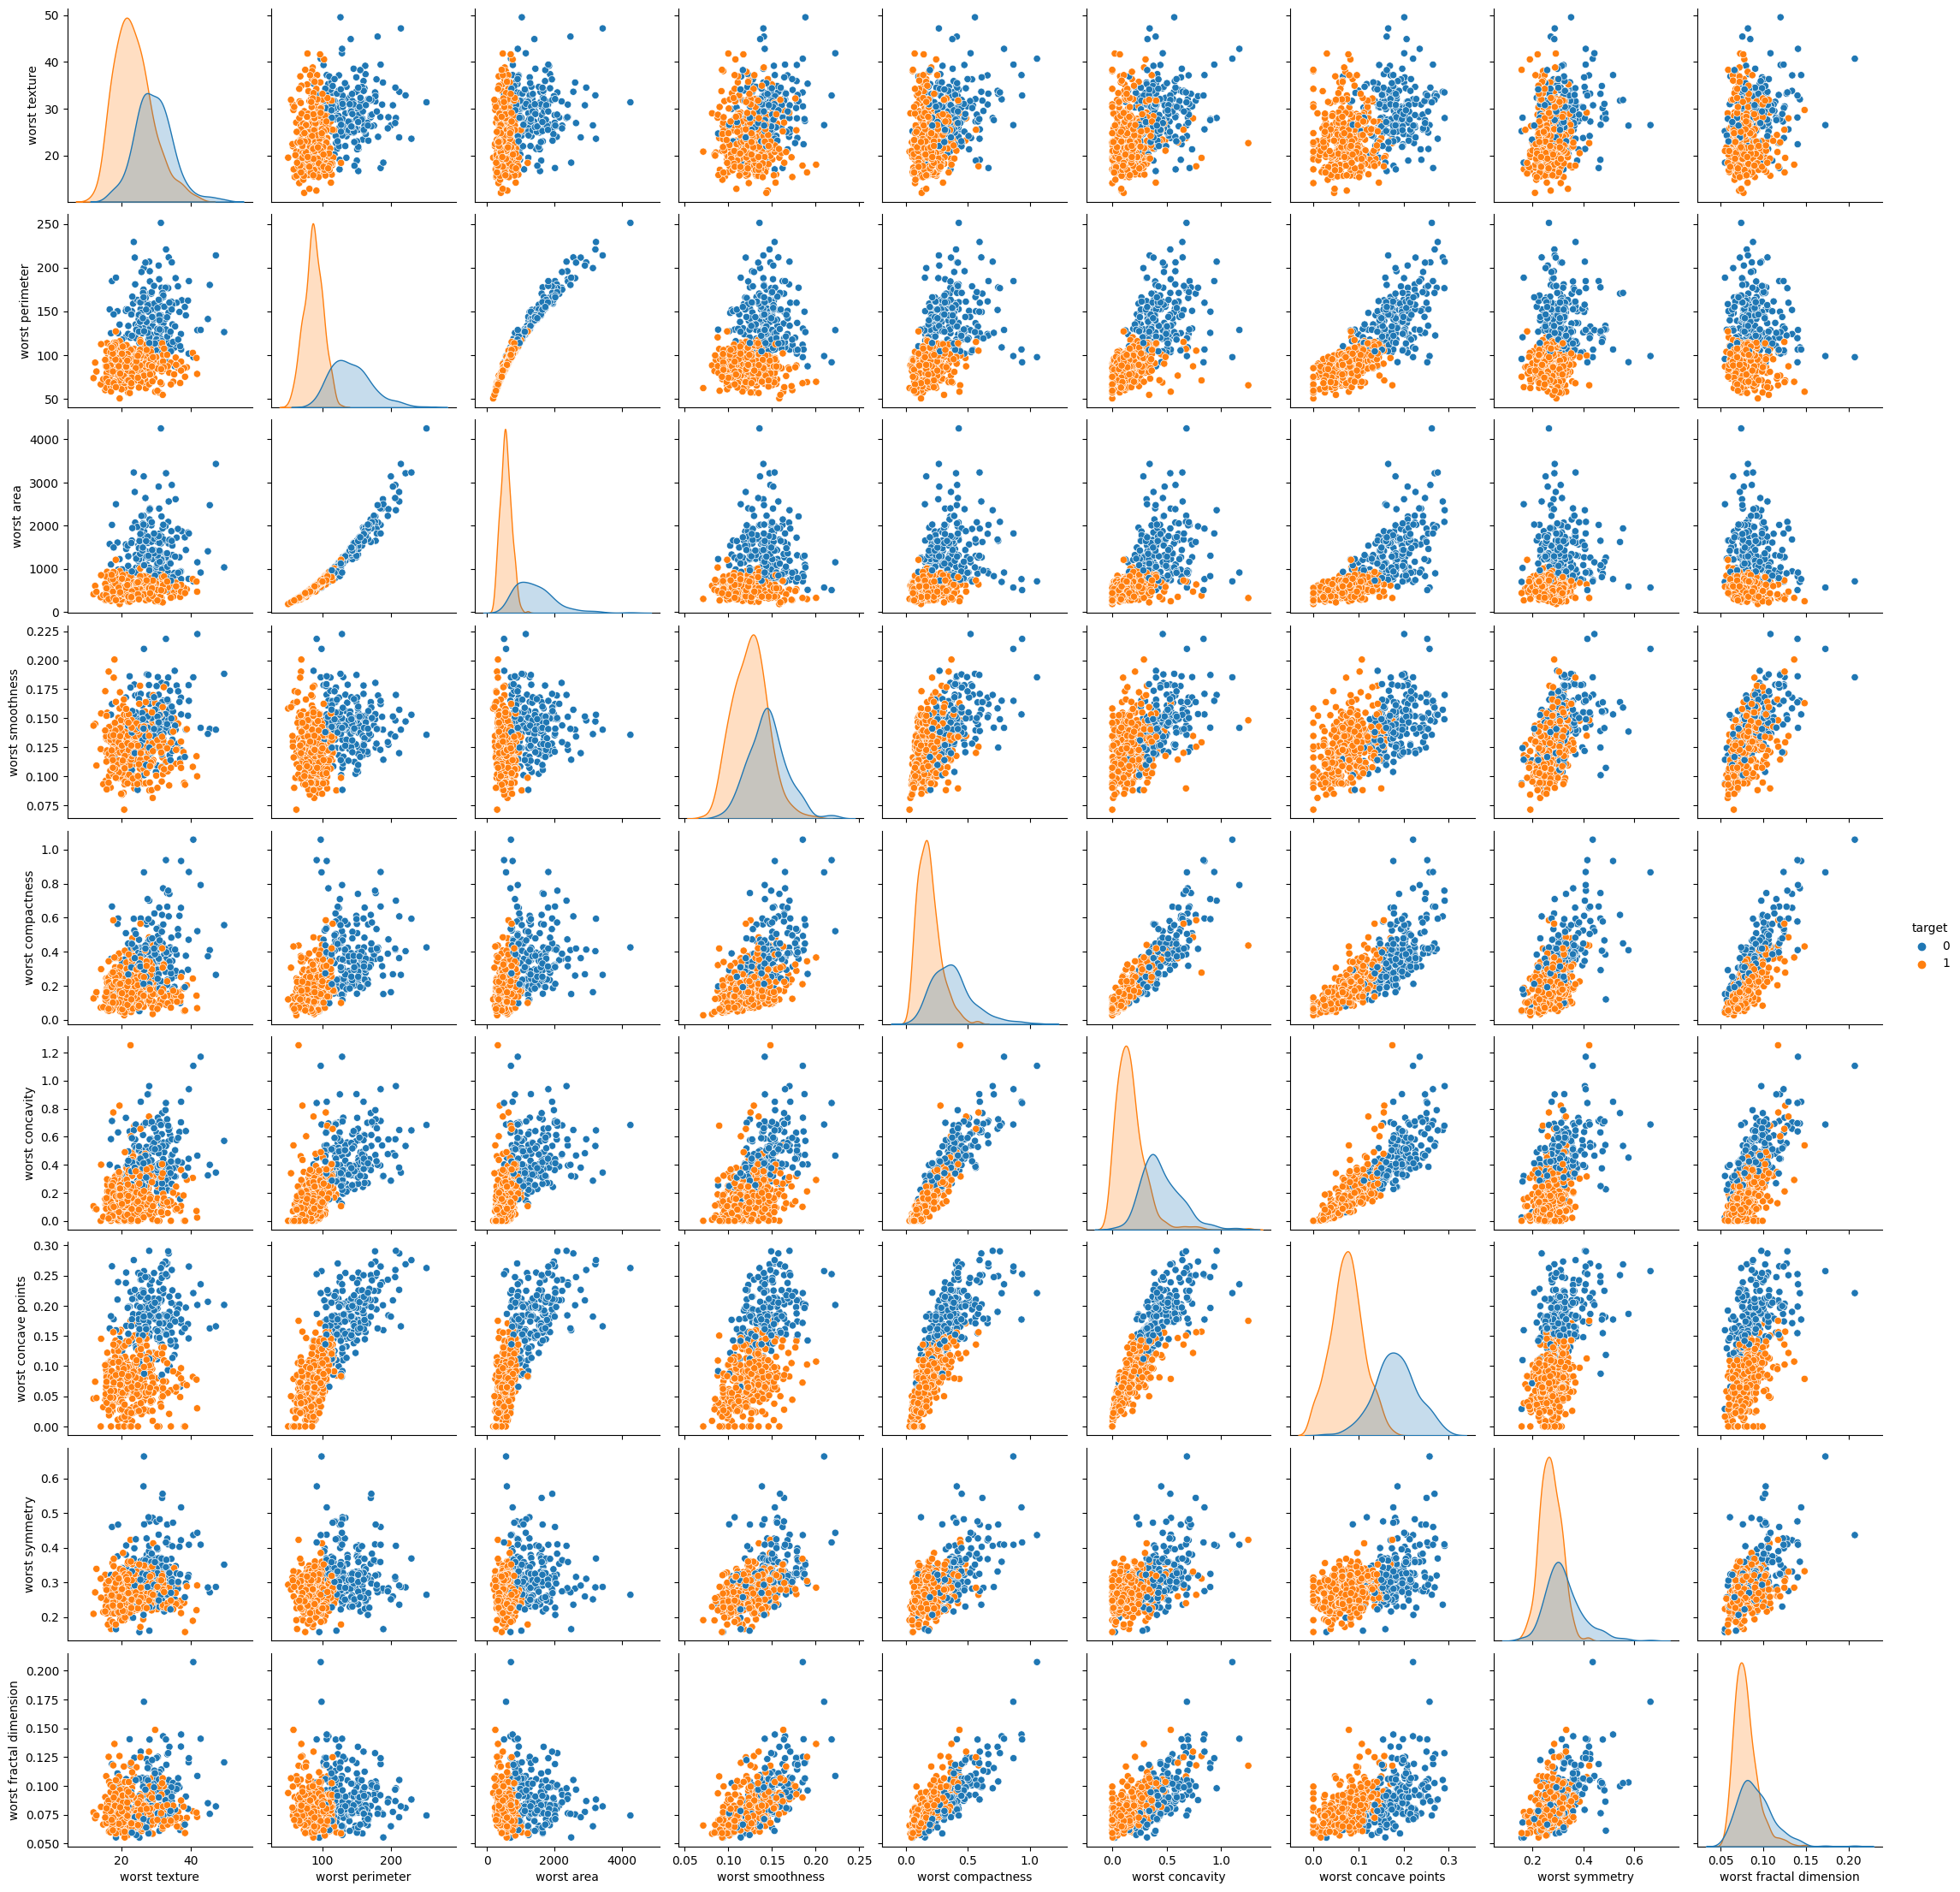

In [ ]:
sns.pairplot(df, hue ="target", vars = ["worst texture", "worst perimeter", "worst area", "worst smoothness", "worst compactness", "worst concavity", "worst concave points", "worst symmetry", "worst fractal dimension"])

# **Desicion Tree**

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {}".format(clfs[-1].tree_.node_count))
print("With ccp_alpha: {}".format(ccp_alphas[-1]))


Number of nodes in the last tree is: 1
With ccp_alpha: 0.3272984419327777


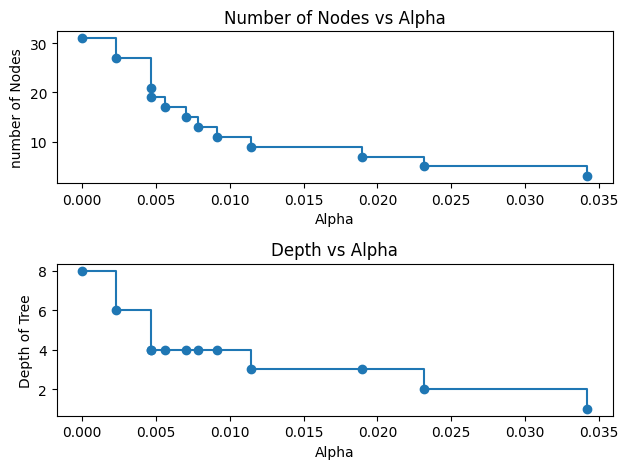

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

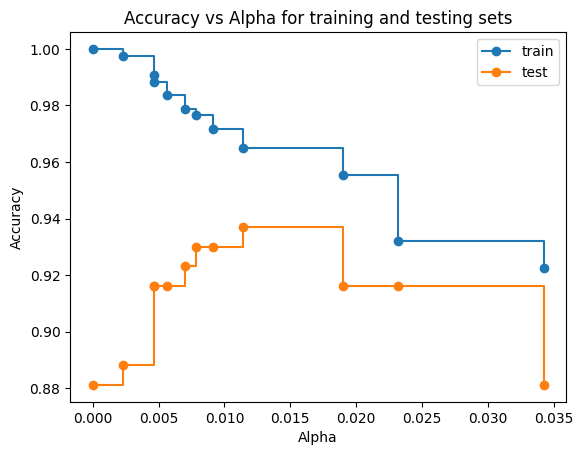

In [ ]:
#Plot of accuracy versus alpha for training and testing sets of a decision tree classifier
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
X = breast_cancer.data
y = breast_cancer.target

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize Random Forest classifier
dt = DecisionTreeClassifier(random_state=42)

#Train the classifier on the training data
dt.fit(X_train, y_train)

#Predictions on the testing data
y_pred = dt.predict(X_test)

#Evaluating the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)

#Evaluate the accuracy of the model on the testing data
print("Accuracy on testing set: {:.3f}".format(dt.score(X_test, y_test)))
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy on testing set: 0.942
Accuracy: 94.15%


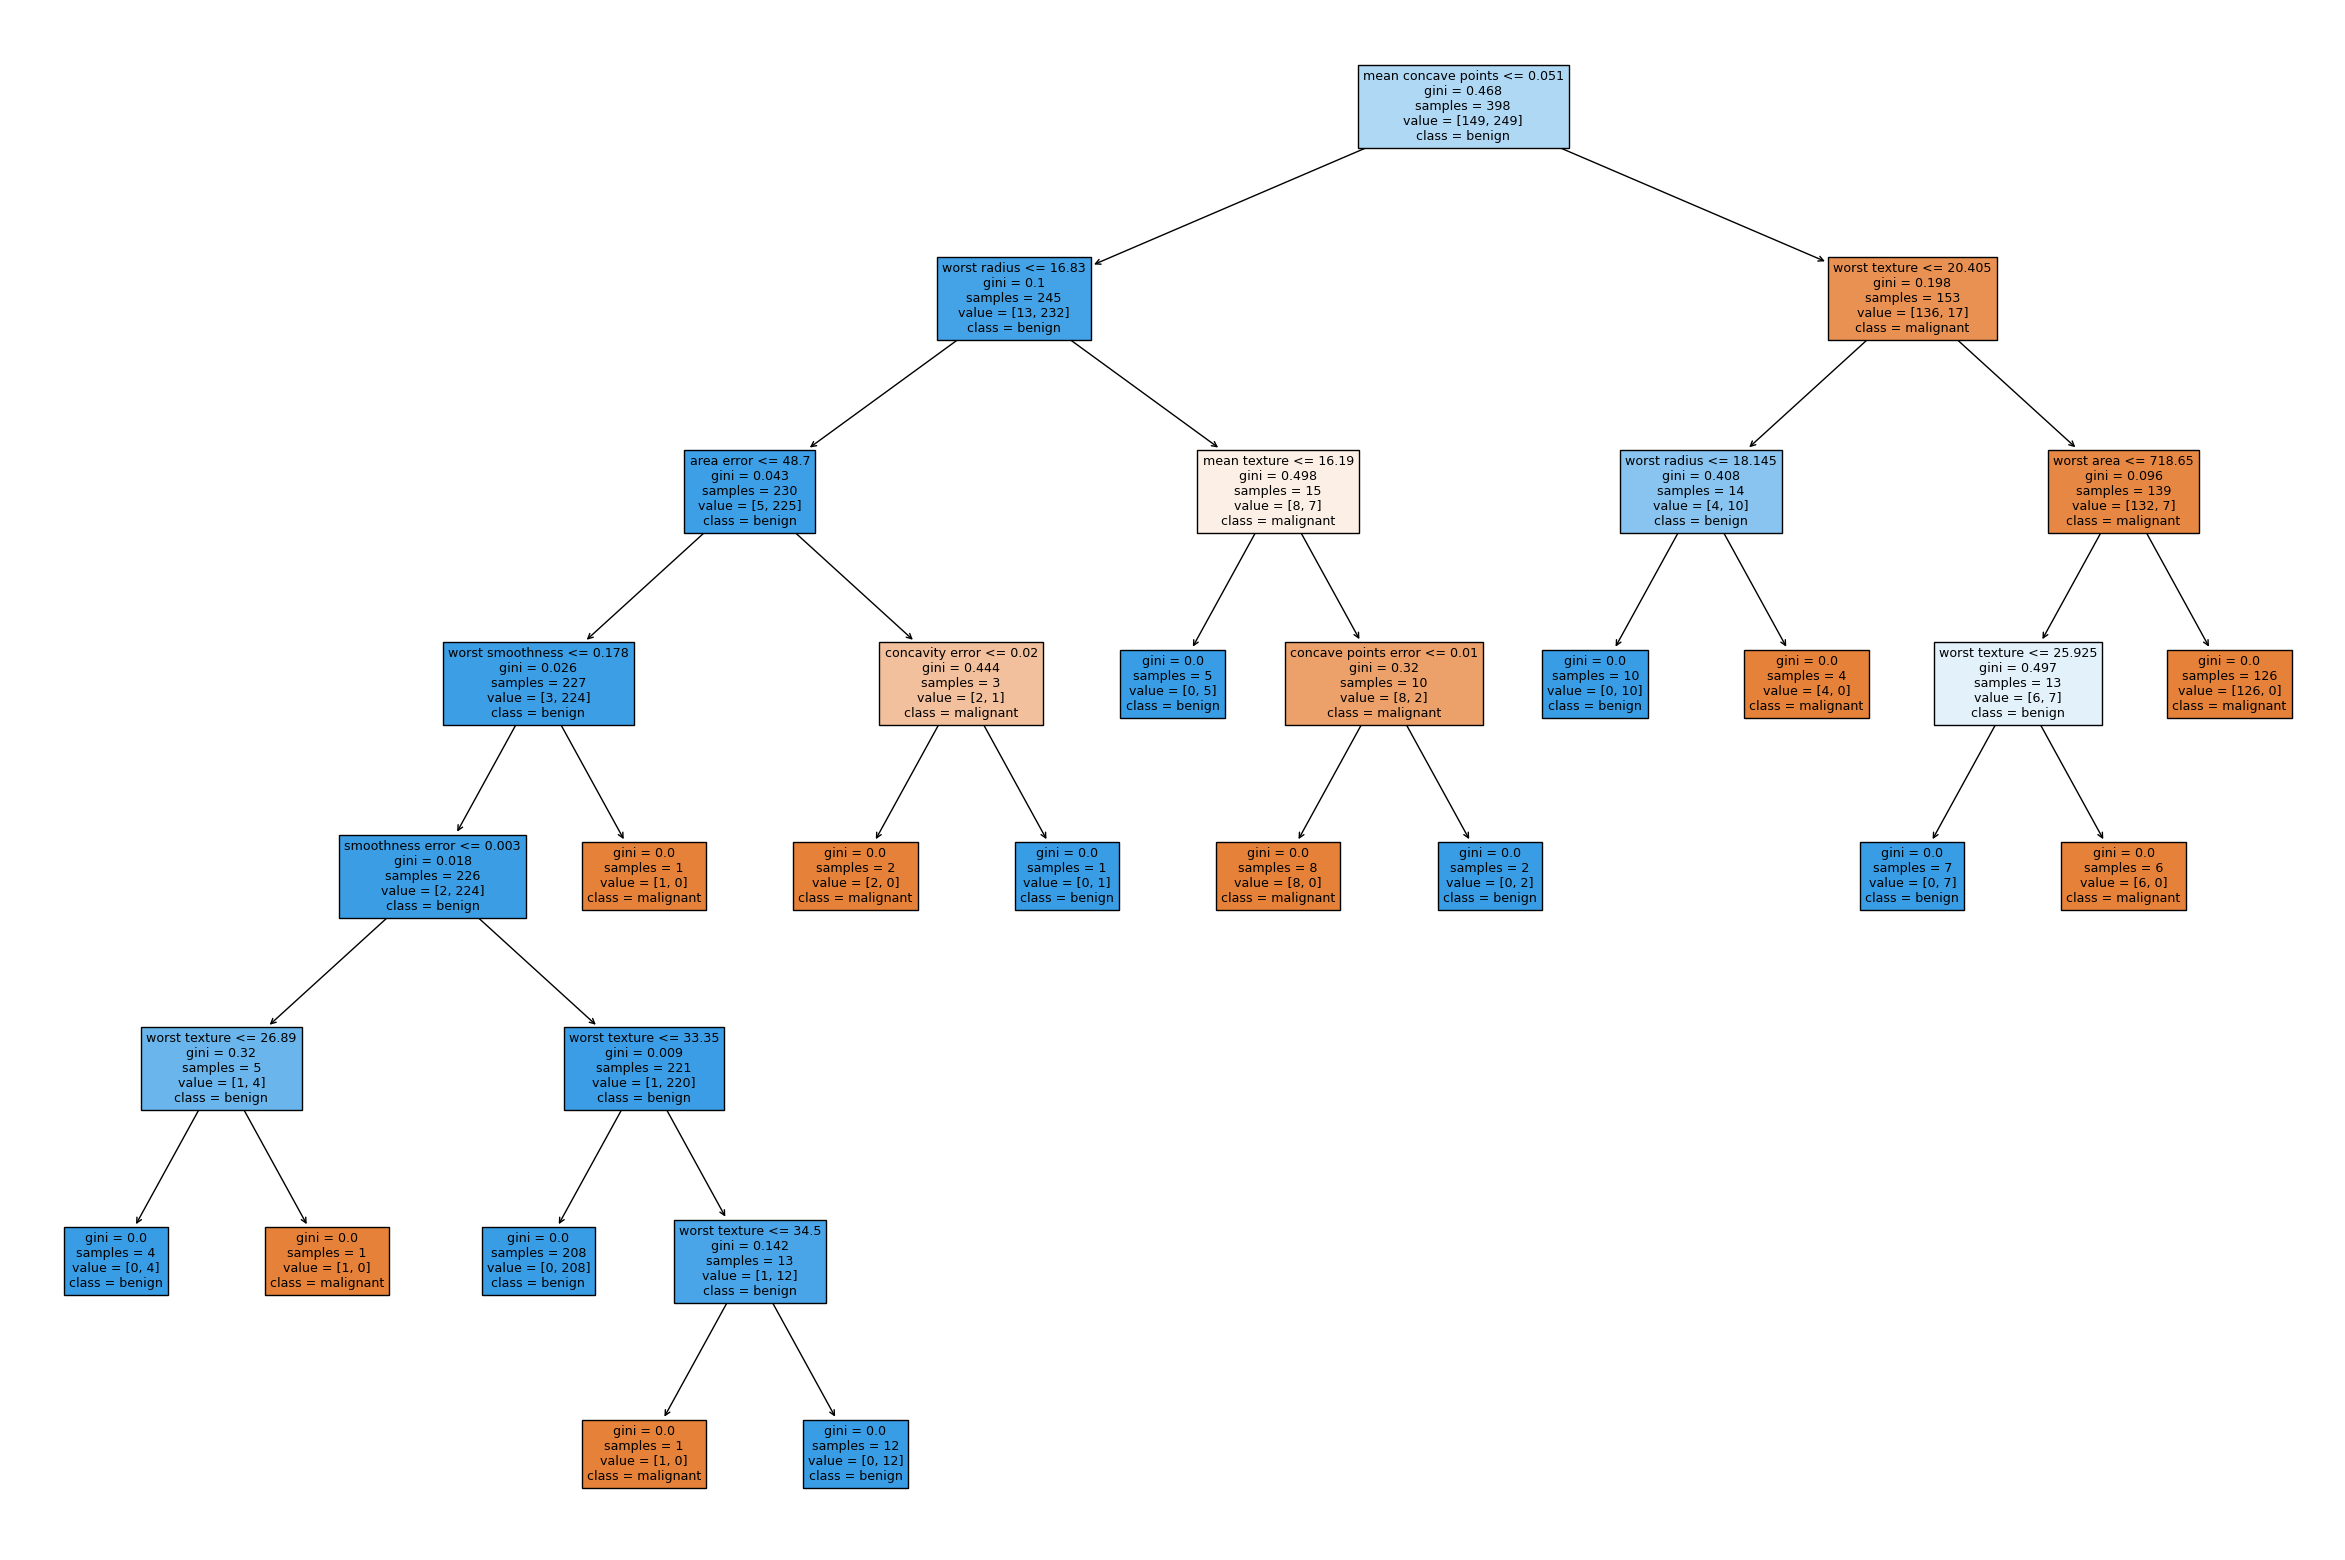

In [ ]:
#Visualize Decision Tree
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(dt, 
                   feature_names=breast_cancer.feature_names,  
                   class_names=breast_cancer.target_names,
                   filled=True)

# **Random Forest**

In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

#Initialize Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the classifier on the training data
rfc.fit(X_train, y_train)

#Predictions on the testing data
y_pred = rfc.predict(X_test)

#Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

Accuracy: 97.076%


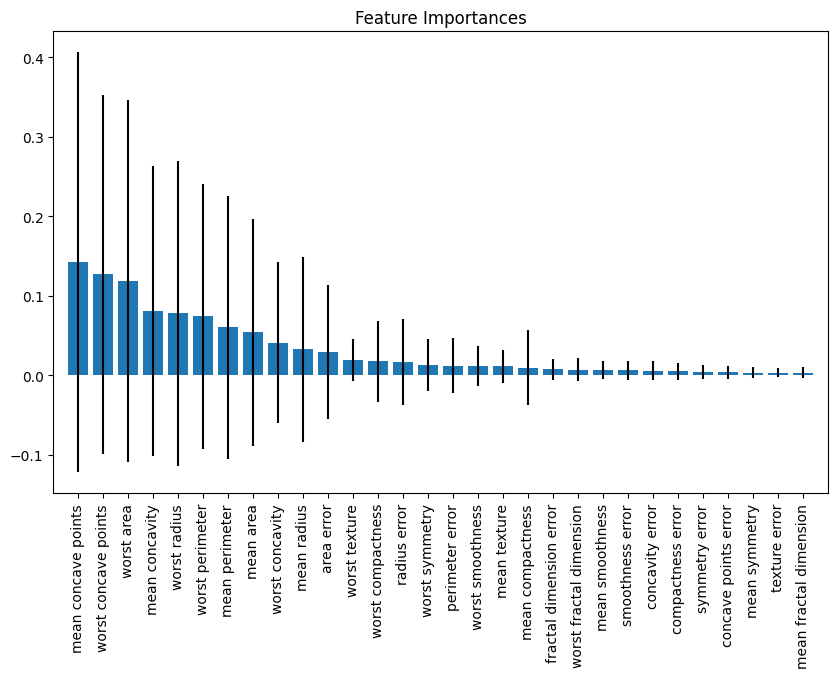

In [ ]:
#Plot feature importances
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), breast_cancer.feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

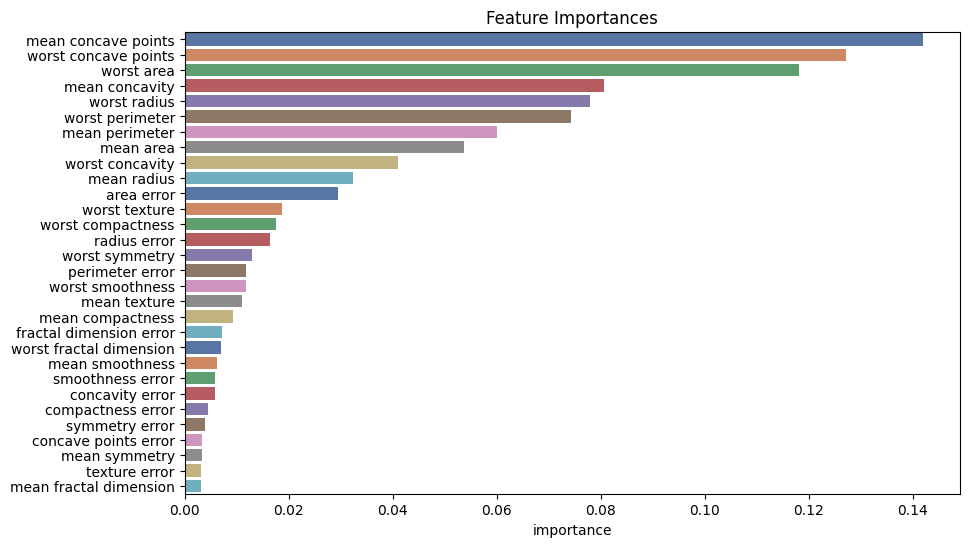

In [ ]:
#Plot feature importances using Seaborn
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame(importances[indices], index=breast_cancer.feature_names[indices], columns=['importance'])
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette="deep")
plt.title("Feature Importances")
plt.show()

Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<Axes: >

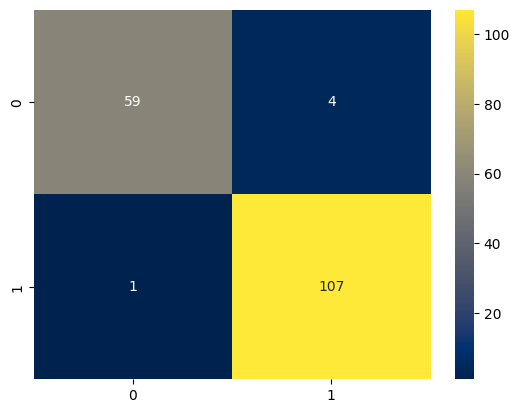

In [ ]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred, zero_division=1))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='cividis', fmt='g')

# **Self-Training**

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

#Initialize a Random Forest classifier for self-training
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Initialize a self-training classifier
self_training = SelfTrainingClassifier(rfc, threshold=0.9, max_iter=100)

#Fit the self-training classifier on the training data
self_training.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = self_training.predict(X_test)

#Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

Accuracy: 97.076%


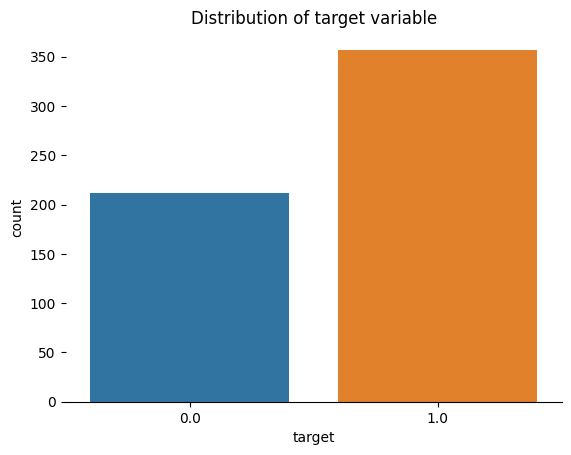

In [ ]:
#Convert the data to a Pandas DataFrame
df = pd.DataFrame(np.c_[breast_cancer['data'], breast_cancer['target']], columns = np.append(breast_cancer['feature_names'], ['target']))

#Plot the distribution of the target variable using Seaborn
sns.countplot(data=df, x='target')
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Distribution of target variable')
plt.show()

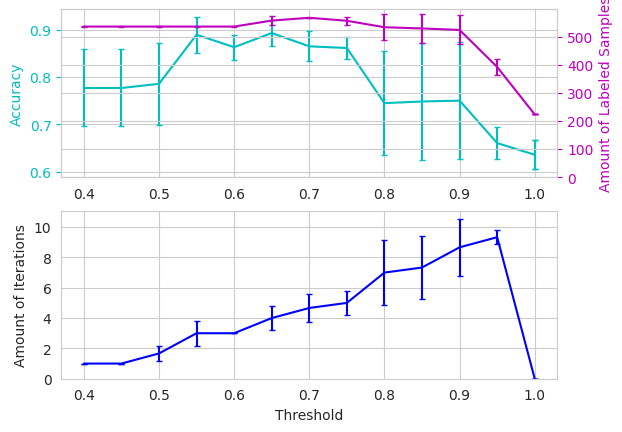

In [ ]:
n_splits = 3
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=42)
y_true = y.copy()
y[50:] = -1
total_samples = y.shape[0]

base_classifier = SVC(probability=True, gamma=0.001, random_state=42)

x_values = np.arange(0.4, 1.05, 0.05)
x_values = np.append(x_values, 0.99999)
scores = np.empty((x_values.shape[0], n_splits))
amount_labeled = np.empty((x_values.shape[0], n_splits))
amount_iterations = np.empty((x_values.shape[0], n_splits))

for i, threshold in enumerate(x_values):
    self_training_clf = SelfTrainingClassifier(base_classifier, threshold=threshold)

    #Manual Cross Validation to Avoid Treating -1 as a Separate Class When Computing Accuracy
    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        y_test_true = y_true[test_index]

        self_training_clf.fit(X_train, y_train)

        #The amount of labeled samples that at the end of fitting
        amount_labeled[i, fold] = (
            total_samples
            - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        )
        #The last iteration the classifier labeled a sample in
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        scores[i, fold] = accuracy_score(y_test_true, y_pred)


ax1 = plt.subplot(211)
ax1.errorbar(
    x_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2, color="c"
)
ax1.set_ylabel("Accuracy", color="c")
ax1.tick_params("y", colors="c")

ax2 = ax1.twinx()
ax2.errorbar(
    x_values,
    amount_labeled.mean(axis=1),
    yerr=amount_labeled.std(axis=1),
    capsize=2,
    color="m",
)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Amount of Labeled Samples", color="m")
ax2.tick_params("y", colors="m")

ax3 = plt.subplot(212, sharex=ax1)
ax3.errorbar(
    x_values,
    amount_iterations.mean(axis=1),
    yerr=amount_iterations.std(axis=1),
    capsize=2,
    color="b",
)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("Amount of Iterations")
ax3.set_xlabel("Threshold")

plt.show()